<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="600" height="200">

# EDA ON UKRAINE CAR SALE ADS DATASET





## Table of Contents

1. [Problem Statement](#section1) <br>
2. [Importing Packages](#section2) <br>
3. [Loading Dataset](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Pandas Profiling before Data Preprocessing](#section4)<br>
5. [Data Cleaning/Preprocessing](#section5)<br>
  - 5.1 [Column standardization](#section501)<br>
  - 5.2 [Remove duplicate records](#section502)<br>
  - 5.3 [Handling missing values](#section503)<br>
6. [Pandas Profiling after Data Preprocessing](#section6)<br>
7. [Exploratory Data Analysis](#section7)<br>
  - 7.1 [Feature Based Analysis](#section701)
    - 7.1.1 [What are the top 10 car brands on sale?](#section70101)
    - 7.1.2 [What is the sale distribution based on engine type?](#section70102)
    - 7.1.3 [What is the sale distribution based on drive type?](#section70103)
    - 7.1.4 [What is the sale distribution based on body type?](#section70104)
    - 7.1.5 [What is the car sale based on registration?](#section70105)
  - 7.2 [Price Based Analysis?](#section702)
    - 7.2.1 [What are car brands on sale based on avg price?](#section70201)
    - 7.2.2 [How price varies based on body type?](#section70202)
    - 7.2.3 [How price varies based on engine type?](#section70203)
    - 7.2.4 [How price varies based on drive type??](#section70204)
  - 7.3 [Mileage Based Analysis](#section703)
    - 7.3.1 [What is sale distribution based on mileage?](#section70301)
    - 7.3.2 [How price varies based on mileage?](#section70302)
    - 7.3.3 [How mileage varies based on body type?](#section70303)
    - 7.3.4 [How mileage varies based on engine type?](#section70304)
    - 7.3.5 [How mileage varies based on drive type?](#section70305)
  - 7.4 [Year Based Analysis](#section704)
    - 7.4.1 [What is the car sale based on year of production?](#section70401)
    - 7.4.2 [How is price variation over years?](#section70402)
  - 7.5 [Multivariant Based Analysis](#section705)
    - 7.5.1 [What is the registered car sale distribution based on body type?](#section70501)
    - 7.5.2 [What is the trend of ukraine registered cars?](#section70502)
    - 7.5.3 [What is the price variance over years based on body type?](#section70503)
    - 7.5.4 [What is the price variance over years based on engine type?](#section70504)
    - 7.5.5 [What is the price variance over years based on drive type?](#section70505)
    - 7.5.6 [What is the price variance over mileage based on engine type?](#section70506)
    - 7.5.7 [What is the price variance over mileage based on body type?](#section70507)
    - 7.5.8 [What is the price variance over mileage based on drive type?](#section70508)
- 8 [Conclusion](#section8)
  - 8.1 [Actionable Insights](#section801)




<a id='section1'></a>
### 1. Problem Statement
 
*   This data was collected from private car sale advertisements in Ukraine and provided by INSAID team to perform Exploratory Data Analysis.
*  This dataset has real raw data which has all inconvenient moments (as NA’s for example).
*   This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. 

<a id=section2></a>
### 2. Importing Packages



In [0]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              
from bokeh.plotting import *
from bokeh.io import output_notebook 
output_notebook()
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

<a id=section3></a>
### 3. Loading Dataset

In [2]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='latin-1')    #Loading car advertisement sale dataset
car_sales.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

<a id=section301></a>
### 3.1 Description of the Datasets

Lets see a sample data from the car sale dataset

In [3]:
car_sales.sample(5)

car      price   body  mileage  engV engType registration  \
5287        Peugeot   6500.000  hatch      120  1.40  Petrol          yes   
2930     Volkswagen  39615.000  sedan        0  2.00  Diesel          yes   
6431  Moskvich-AZLK   1100.000  hatch       30  1.60     Gas          yes   
5239            VAZ    833.625  sedan        1  1.20     Gas          yes   
5088           Ford   8900.000  hatch       85  1.25  Petrol          yes   

      year      model  drive  
5287  2006        207  front  
2930  2016  Passat B8  front  
6431  1990       2141    NaN  
5239  1984       2101   rear  
5088  2013     Fiesta  front

Lets see the basic information about the dataset.

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


Info funtion on the dataset gives us the following insights: <br>
* There are a total of **9576 samples (rows)** and **10 columns** in the dataframe.
* There are **4 columns** with a **numeric** datatype and **6 columns** with an **object** datatype.
* There are **missing values** in the **engV and drive** column.<br>
* Columns description:<br>
•	**car**: Manufacturer brand<br>
•	**price**: Seller’s price in advertisement (in USD) <br>
•	**body**: Car body type <br>
•	**mileage**: Car mileage as mentioned in advertisement (‘000 Km)<br>
•	**engV**: Rounded car engine volume (‘000 cubic cm)<br>
•	**engType**: Type of fuel (“Other” in this case should be treated as NA)<br>
•	**registration**: Whether car registered in Ukraine or not<br>
•	**year**: Year of production <br>
•	**model**: Specific model name <br>
•	**drive**: Drive type <br>


In [5]:
car_sales.describe()

price      mileage         engV         year
count    9576.000000  9576.000000  9142.000000  9576.000000
mean    15633.317316   138.862364     2.646344  2006.605994
std     24106.523436    98.629754     5.927699     7.067924
min         0.000000     0.000000     0.100000  1953.000000
25%      4999.000000    70.000000     1.600000  2004.000000
50%      9200.000000   128.000000     2.000000  2008.000000
75%     16700.000000   194.000000     2.500000  2012.000000
max    547800.000000   999.000000    99.990000  2016.000000

Describe function on the dataset gives us the following insights:<br>
* **Engine volume** has **434 missing** values and **Drive** has **511 missing** values.
* The distribution of **price** is **positive(right) skewed** because the mean of price (15633.317) lies to the right of the median(50%) value (9200.00), on a distribution plot.
* The **max** value of **price (547800.00)** is **far** away from the **mean(15633.31)**, so there are some **outliers** in the price distribution.
* The **max** value of **mileage (999)** is **far** away from the **mean (138.86)**, so there are some **outliers** in the mileage distribution. 
* The **max** value of **engine volume (99.99)** is far away from the mean(2.6), so there are some outliers in the volume distribution.
* The distribution of **mileage** and **engine volume** is **positive(right) skewed** because the mean lies to the right of median values.
* **Price**  and **mileage** has **minimum 0 **value which is not possible. Ideally we can replace them with NaN.






In [6]:
car_sales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

<a id=section4></a> 
### 4. Pandas Profiling before Data Preprocessing

Here, we will perform **Pandas Profiling before preprocessing** our dataset:<br>
* **Install** pandas profiling<br>
* **Import** pandas profiling<br>
* **Generate** the profile report (__car_sales_pre_profiling.html__) to get quick overview of the variables in the dataset.

In [7]:
#!pip install pandas-profiling==1.4.3
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.5.0)


In [8]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(car_sales)

In [9]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
profile = car_sales.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file("car_sales_profiling_before_processing.html")   

# To output the pandas profiling report on the notebook.

car_sales.profile_report(title='Pandas Profiling before Data Preprocessing')


**Observations from Pandas Profiling before Data Processing** <br><br>
**Dataset info:**
* Number of variables: 10
* Number of observations: 9576
* Missing cells: 945 (1.0%)
* Duplicate rows: 113(1.2%)

**Summary of data types in this dataset:**<br>
* Numeric: 4
* Categorical : 5 
* Bool: 1

**Insights:**

* **car** has a **high cardinality** (87 distinct values). **Volkswagen** cars have **highest** count (936) and has frequency of 9.8%.
* **price** has **267 zeros** which should be treated as missing values. **price** has **skewness** of **7.131** and **kurtosis** of **93.743**
*  **Body type** has a **6 distinct** values. **Sedan type** of cars **tops** the list with **3646** records.
* **mileage** has **348 zeros** which should be treated as missing values. 
* **engV** has **434 missing** values. It has **skewness** of **15.182** and **kurtosis** of **239.791**
* **engtype** has has a **4 distinct** values.**Petrol type** of cars **tops** the list with **4379** records. It has "**Other**" values as well, we can treat them as NaN.
* **registration** is a **boolean** column and '**yes**' data **leads** with **9015** values which means we have **more** of **ukraine registered cars** for sale.
* **model** has **high cardinality**(888 distinct values)
* **Drive** has **511 missing** values.





<a id=section5></a> 
### 5. Data Cleaning/Preprocessing

<a id=section501></a> 
### 5.1 Column standardization


Standardize all column headers to lower case (to prevent typos and for ease of use)

In [10]:
car_sales.columns = map(str.lower, car_sales.columns) 
car_sales.dtypes

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section502></a> 
### 5.2 Remove duplicate records

There are 113 duplicate rows/records which should be removed.

In [11]:
car_sales.drop_duplicates(inplace=True) 
car_sales.shape

(9463, 10)

<a id=section503></a> 
### 5.3 Handling missing values

* **267 zeros** of **price** values should be **replaced** with **NaN**. 
* **348 zeros** of **mileage** values should be **replaced** with **NaN**.
* "**Other**" values of **engtype** should be **replaced** to **NaN**.


In [12]:
car_sales.replace({'engtype': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)
car_sales.isnull().sum()

car               0
price           240
body              0
mileage         310
engv            434
engtype         462
registration      0
year              0
model             0
drive           510
dtype: int64

The price has 240 null/missing values which should be replaced with their respective median values based on car and model.


In [13]:
def find_price_median(df):
    if df.count() > 0:
        return df.median() 
    else:                 
        return car_sales['price'].median()                        
    
price_median = car_sales.groupby(['car','model'])['price'].apply(find_price_median).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

car model  price_med
0  Acura   MDX    17200.0
1  Acura    RL    13950.0
2  Acura    TL     8699.0
3  Acura   TLX    38200.0
4  Acura   ZDX    30999.0

* price_median dataset has 3 columns: car, model and price_med. <br>
* It represents the median values of price based on the car and model.<br>
* Using this data, now the missing values of price in the car sales dataset can be replaced with the price median value based on car and model.

In [14]:
def fill_price_median(df):
    if pd.isnull(df['price']):
        return price_median[(price_median['car'] == df['car']) & (price_median['model'] == df['model'])]['price_med'].values[0]
    else:
        return df['price']
    
car_sales['price'] = car_sales.apply(fill_price_median, axis=1)
car_sales.head()

car    price       body  mileage  engv engtype registration  \
0           Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon     91.0   NaN     NaN          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

The engine volume had 434 null/missing values which should be replaced with their respective median values based on car and model.

In [15]:
def find_engv_median(df):
    if df.count() > 0:
        return df.median() 
    else:                 
        return car_sales['engv'].median()                        
    
engv_median = car_sales.groupby(['car','model'])['engv'].apply(find_engv_median).reset_index()
engv_median.rename(columns={'engv': 'engv_med'}, inplace=True)
engv_median.head()

car model  engv_med
0  Acura   MDX       3.7
1  Acura    RL       3.5
2  Acura    TL       3.2
3  Acura   TLX       2.4
4  Acura   ZDX       3.7

* engv_median dataset has 3 columns: car, model and engv_med.
* It represents the median values of engine volume based on the car and model.
* Using this data, now the missing values of engine volume in the car sales dataset can be replaced with the engine volume median value based on car and model.

In [16]:
def fill_engv_median(df):
    if pd.isnull(df['engv']):
        return engv_median[(engv_median['car'] == df['car']) & (engv_median['model'] == df['model'])]['engv_med'].values[0]
    else:
        return df['engv']
    
car_sales['engv'] = car_sales.apply(fill_engv_median, axis=1)
car_sales.head()

car    price       body  mileage  engv engtype registration  \
0           Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

The mileage has 310 null/missing values which should be replaced with their respective median values based on car and model.

In [17]:
def find_mile_median(df):
    if df.count() > 0:
        return df.median() 
    else:                 
        return car_sales['mileage'].median()                        
    
mile_median = car_sales.groupby(['car','model'])['mileage'].apply(find_mile_median).reset_index()
mile_median.rename(columns={'mileage': 'mile_med'}, inplace=True)
mile_median.head()

car model  mile_med
0  Acura   MDX      85.0
1  Acura    RL     138.0
2  Acura    TL     145.0
3  Acura   TLX       4.0
4  Acura   ZDX      32.0

* mile_median dataset has 3 columns: car, model and mile_med.
* It represents the median values of mileage based on the car and model.
* Using this data, now the missing values of mileage in the car sales dataset can be replaced with the mileage median value based on car and model.

In [18]:
def fill_mile_median(df):
    if pd.isnull(df['mileage']):
        return mile_median[(mile_median['car'] == df['car']) & (mile_median['model'] == df['model'])]['mile_med'].values[0]
    else:
        return df['mileage']
    
car_sales['mileage'] = car_sales.apply(fill_mile_median, axis=1)
car_sales.head()

car    price       body  mileage  engv engtype registration  \
0           Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

The drive has 510 null/missing values which should be replaced with their respective mode values based on car and model.

In [19]:
def find_drive_mode(df):
    if df.count() > 0:
        return df.mode() 
    else:                 
        return car_sales['drive'].mode()                        
    
drive_mode = car_sales.groupby(['car','model'])['drive'].apply(find_drive_mode).reset_index().drop('level_2', axis=1)
drive_mode.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_mode.head()

car model drive_mode
0  Acura   MDX       full
1  Acura    RL       full
2  Acura    TL      front
3  Acura   TLX      front
4  Acura   ZDX       full

* drive_mode dataset has 3 columns: car, model and drive_mode.
* It represents the mode values of drive based on the car and model.
* Using this data, now the missing values of drive in the car sales dataset can be replaced with the drive mode value based on car and model.

In [20]:
def fill_drive_mode(df):
    if pd.isnull(df['drive']):
        return drive_mode[(drive_mode['car'] == df['car']) & (drive_mode['model'] == df['model'])]['drive_mode'].values[0]
    else:
        return df['drive']
    
car_sales['drive'] = car_sales.apply(fill_drive_mode, axis=1)
car_sales.head()

car    price       body  mileage  engv engtype registration  \
0           Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon     91.0   2.6     NaN          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class   rear

The engine type has 462 null/missing values which should be replaced with their respective mode values based on car and model.

In [21]:
def find_engtype_mode(df):
    if df.count() > 0:
        return df.mode() 
    else:                 
        return car_sales['engtype'].mode()                        
    
engtype_mode = car_sales.groupby(['car','model'])['engtype'].apply(find_engtype_mode).reset_index().drop('level_2', axis=1)
engtype_mode.rename(columns={'engtype': 'engtype_mode'}, inplace=True)
engtype_mode.head()

car model engtype_mode
0  Acura   MDX       Petrol
1  Acura    RL          Gas
2  Acura    TL          Gas
3  Acura   TLX       Petrol
4  Acura   ZDX       Petrol

* engtype_mode dataset has 3 columns: car, model and engtype_mode
* It represents the mode values of engine type based on the car and model.
* Using this data, now the missing values of engine type in the car sales dataset can be replaced with the engine type mode value based on car and model.

In [22]:
def fill_engtype_mode(df):
    if pd.isnull(df['engtype']):
        return engtype_mode[(engtype_mode['car'] == df['car']) & (engtype_mode['model'] == df['model'])]['engtype_mode'].values[0]
    else:
        return df['engtype']
    
car_sales['engtype'] = car_sales.apply(fill_engtype_mode, axis=1)
car_sales.head()

car    price       body  mileage  engv engtype registration  \
0           Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon     91.0   2.6  Diesel          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class   rear

In [23]:
car_sales.isnull().sum()   # No missing values

car             0
price           0
body            0
mileage         0
engv            0
engtype         0
registration    0
year            0
model           0
drive           0
dtype: int64

This implies that there are no null/missing values in the car sales dataset

<a id=section6></a> 
### 6. Pandas Profiling after Data Preprocessing

Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __car_sales_profiling_after_preprocessing.html__.

In [24]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = car_sales.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="car_sales_profiling_after_preprocessing.html")

# To output the pandas profiling report on the notebook.

car_sales.profile_report(title='Pandas Profiling after Data Preprocessing')

**Observations from Pandas Profiling before Data Processing:**<br>

**Dataset info:**
* Number of variables: 11
* Number of observations: 9463

**Summary of data types in this dataset:**
* Numeric: 5
* Categorical : 5 
* Bool: 1

**Insights:**

* **car** has a **high cardinality** (87 distinct values).
* **model** has **high cardinality**(888 distinct values)
These high cardinalities are fine, because we have different car brands and models available in the market.


In [0]:
car_sales.to_csv('car_sales_refined.csv')    

<a id=section7></a> 
### 7. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach for analyzing data sets** and to **summarize** their **main characteristics**, often with **visual methods**.

<a id=section701></a>
### 7.1 Feature Based Analysis

<a id=section70101></a>
### 7.1.1 What are the top 10 car brands on sale?

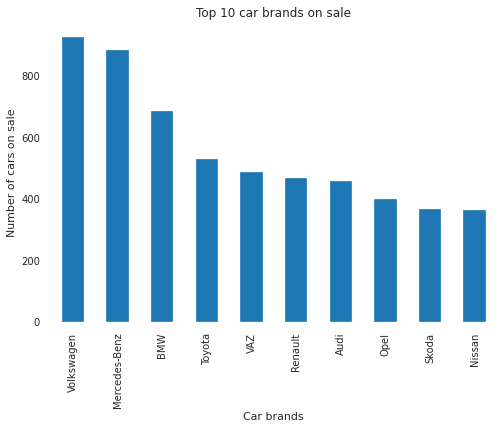

In [26]:
car_sales.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")
plt.xlabel('Car brands')
plt.ylabel('Number of cars on sale')
plt.savefig('Top_10_cars.png')

These are the top 10 car brands out of 87 brands which were advertised for sale over years based on the given dataset, in which **Volkswagen** has the **highest** count of cars on sale.


<a id=section70102></a>
### 7.1.2 What is the sale distribution based on engine type?

Text(0.5, 1.0, 'Sale distribution based on engine type')

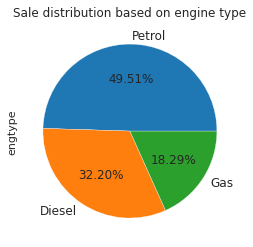

In [27]:
car_sales.engtype.value_counts().plot(kind = 'pie', figsize = (4,4), autopct ='%.2f%%', fontsize = 12)
plt.title("Sale distribution based on engine type")

Text(0.5, 1.0, 'Sale distribution based on engine type')

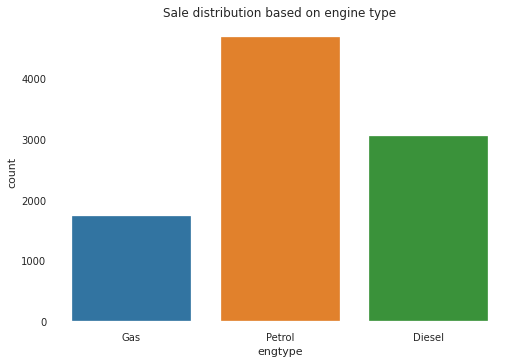

In [28]:
sns.countplot(x='engtype', data=car_sales, orient='h')
plt.title("Sale distribution based on engine type")

This explains that cars with **petrol** engine types are high on sale. It constitutes **49.51%**  of total cars on sale.


<a id=section70103></a>
### 7.1.3 What is the sale distribution based on drive type?

Text(0.5, 1.0, 'Sale distribution based on drive type')

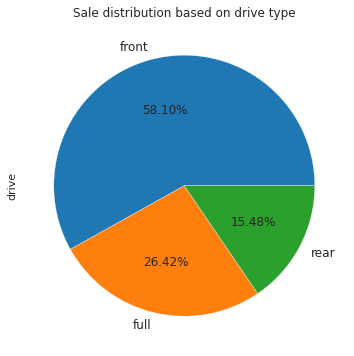

In [29]:
car_sales.drive.value_counts().plot(kind = 'pie', figsize = (6,6), autopct ='%.2f%%', fontsize = 12)
plt.title('Sale distribution based on drive type')

This explains that **front** drive type cars are mostly on sale.


<a id=section70104></a>
### 7.1.4 What is the sale distribution based on the body type?

Text(0, 0.5, 'Body Type')

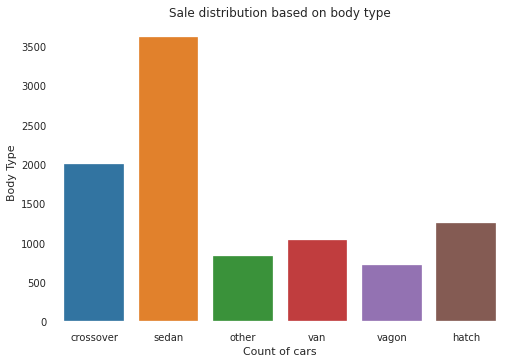

In [30]:
sns.countplot(x='body', data=car_sales, orient='h')
plt.title("Sale distribution based on body type")
plt.xlabel('Count of cars')
plt.ylabel('Body Type')

This explains that **sedan** type followed by **crossover** are the popular body types of cars on sale.

<a id=section70105></a>
### 7.1.5 What is sale based on registration?

Text(0.5, 1.0, 'Sale distribution based on registration')

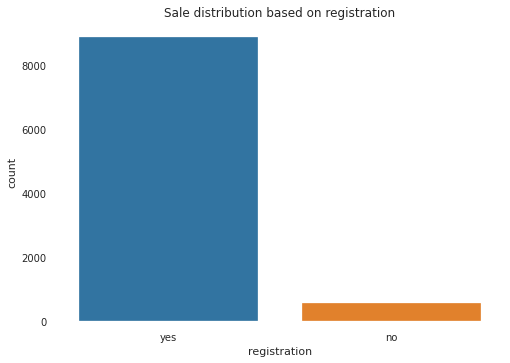

In [31]:
sns.countplot(x='registration', data=car_sales, orient='h')
plt.title("Sale distribution based on registration")

This explains that cars both registered in ukraine and from a different country were available on sale based on the dataset, in which 6% of cars were registered from a different country.


<a id=section702></a>
### 7.2 Price Based Analysis

<a id=section70201></a>
### 7.2.1 What are the car brands with highest and lowest price for sale?

In [32]:
top_brand_price =  pd.DataFrame((car_sales.sort_values(by='price',ascending = False)).groupby('car')['price'].mean())
top_brand_price.reset_index(inplace = True)
top_brand_price.sort_values(['price'], ascending = False).head(5)

car          price
8       Bentley  228082.615385
23      Ferrari  167500.000000
64  Rolls-Royce  130000.000000
43  Lamborghini  130000.000000
51     Maserati  110000.000000

In [33]:
top_brand_price.sort_values(['price'], ascending = True).head(5)

car        price
83       Wartburg  1000.000000
57   Moskvich-Izh  1176.102590
56  Moskvich-AZLK  1629.166667
44         Lancia  2166.666667
80            VAZ  2892.539857

Text(0.5, 0, 'Car brands')

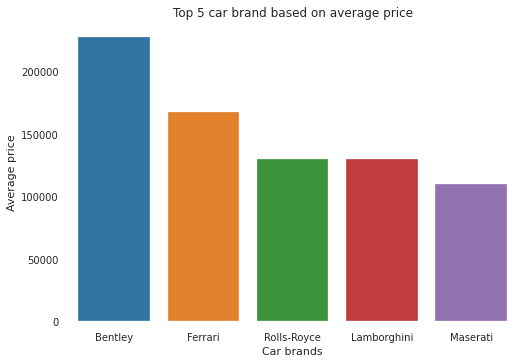

In [34]:
sns.barplot(x='car', data=top_brand_price.sort_values(['price'],ascending = False).head(5), y = 'price', )
plt.title("Top 5 car brand based on average price")
plt.ylabel('Average price')
plt.xlabel('Car brands')

Text(0.5, 0, 'Car brands')

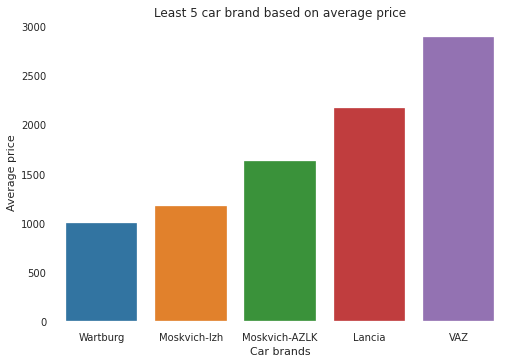

In [35]:
sns.barplot(x='car', data=top_brand_price.sort_values(['price'],ascending = True).head(5), y = 'price', )
plt.title("Least 5 car brand based on average price")
plt.ylabel('Average price')
plt.xlabel('Car brands')

**Bently** followed by **Ferrari** car brands have **highest** average price on sale. **Wartburg** followed by **Moskvich-izh** car brands have the **least** average price on sale.



<a id=section70202></a>
### 7.2.2 How price varies based on body type?


Text(0.5, 1.0, 'Price on sale based on car body type')

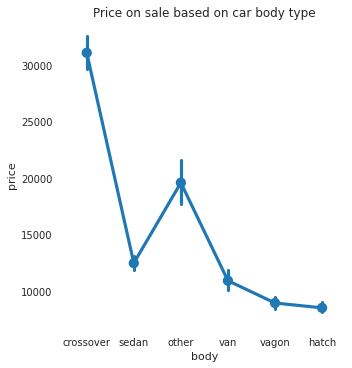

In [36]:
sns.factorplot(data = car_sales, x='body', y='price', size=5)
plt.title('Price on sale based on car body type')

Text(0.5, 1.0, 'Average Price on sale based on car body type')

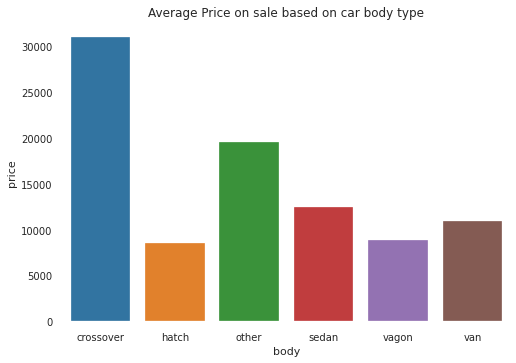

In [37]:
avgprice_body = car_sales.groupby('body').price.mean().reset_index()
sns.barplot(data = avgprice_body, x='body', y='price')
plt.title('Average Price on sale based on car body type')

This explains that **crossover** followed by other and sedan body type of cars have **high** **price** on sale.

<a id=section70203></a>
### 7.2.3 How price varies based on engine type?

Text(0.5, 1.0, 'Price on sale based on engine type')

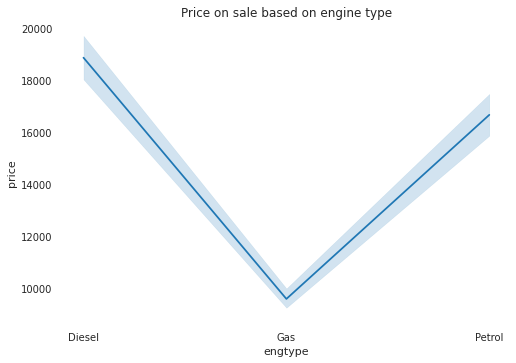

In [38]:
sns.lineplot(x='engtype', y='price', data=car_sales)
plt.title('Price on sale based on engine type')

Text(0.5, 1.0, 'Average price on sale based on engine type')

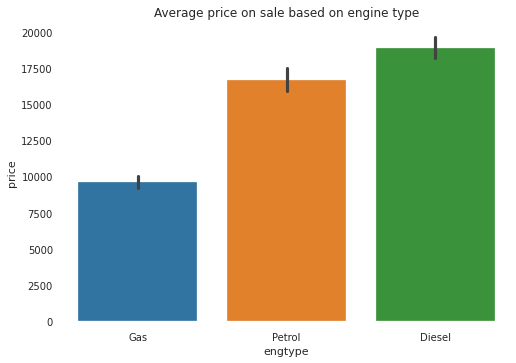

In [39]:
avgprice_eng = car_sales.groupby('engtype').price.mean().reset_index()
sns.barplot(x=car_sales['engtype'], y= car_sales['price'], data=avgprice_eng)
plt.title('Average price on sale based on engine type')

This explains that **diesel** engine type of cars followed by petrol have **high** prices on sale. However based on number of cars, petrol engine type of cars were high on sale.


<a id=section70204></a>
### 7.2.4 How price varies based on drive type?

Text(0.5, 1.0, 'Price on sale based on drive type')

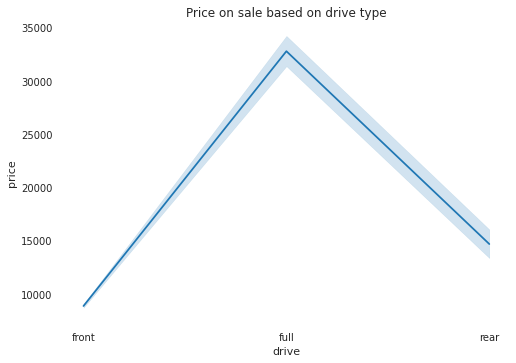

In [40]:
sns.lineplot(x='drive', y='price', data=car_sales)
plt.title('Price on sale based on drive type')

Text(0.5, 1.0, 'Average price on sale based on drive type')

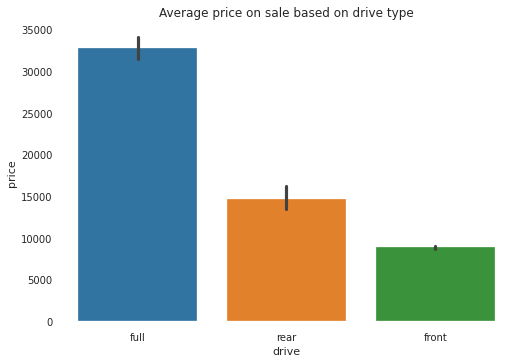

In [41]:
avgprice_drive = car_sales.groupby('drive').price.mean().reset_index()
sns.barplot(x=car_sales['drive'], y= car_sales['price'], data=avgprice_drive)
plt.title('Average price on sale based on drive type')

This explains that **full** drive type cars followed by rear have **high prices** on sale. However, based on the number of  cars,  the front drive cars are the ones high on sale.

<a id=section703></a>
### 7.3 Mileage based analysis

<a id=section70301></a>
### 7.3.1 What is the sale distribution based on mileage?

In [42]:
df3 = pd.DataFrame(car_sales.groupby('mileage')['car'].value_counts().sort_values(ascending=False))
df3.rename(columns={'car': 'carcounts'}, inplace=True)
df3.reset_index(inplace = True)
df4 = pd.DataFrame(df3.groupby('mileage')['carcounts'].sum().sort_values(ascending=False))
df4.rename(columns={'carcounts': 'totalcarcount'}, inplace=True)
df4.reset_index(inplace = True)
df4.head()

mileage  totalcarcount
0      1.0            327
1    200.0            170
2    150.0            131
3    130.0            129
4    250.0            128

Text(0.5, 1.0, 'Sale distribution based on mileage')

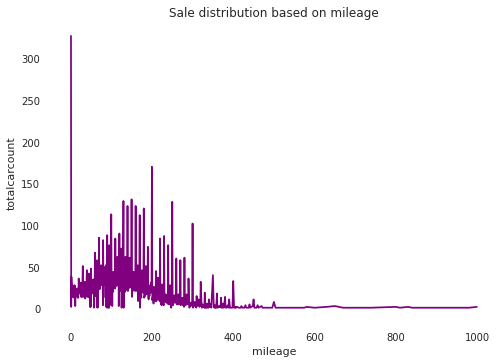

In [43]:
sns.lineplot(x='mileage', y = 'totalcarcount', data=df4, color='Purple' )
plt.title("Sale distribution based on mileage")

This shows that prominently **more cars** were on sale which had **lesser mileage**.


<a id=section70302></a>
### 7.3.2 How price varies based on mileage?

Text(0.5, 1.0, 'Price variation based on mileage')

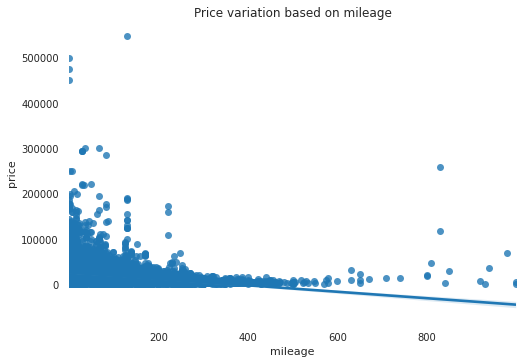

In [44]:
sns.regplot(x='mileage',y='price',data=car_sales)
plt.title("Price variation based on mileage")

This shows that variation in mileage affects the price of the car and they are inversely/ negatively co-related. **Lesser mileage** cars were quoted with **fair price** on sale.

<a id=section70302></a>
### 7.3.2 How mileage varies based on body type?

Text(0.5, 1.0, 'Mileage variation based on body types')

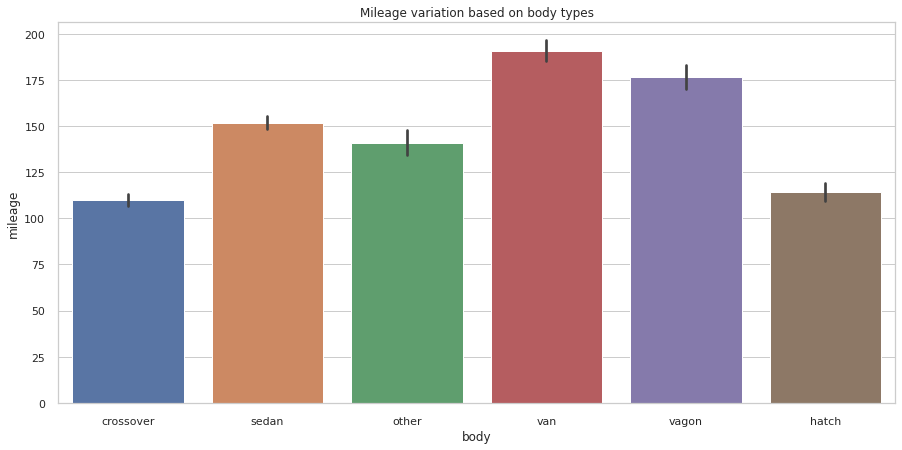

In [45]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.barplot(x="body", y='mileage', data = car_sales)
plt.title('Mileage variation based on body types')


This explains that higher mileage is driven by cars with van body type followed by vagon and sedan. As the mileage increases, the maintenance of the used cars also increases hence this will have an impact on the  buyer’s decision.

<a id=section70303></a>
### 7.3.3 How mileage varies based on engine type?

Text(0.5, 1.0, 'Mileage variation based on engine types')

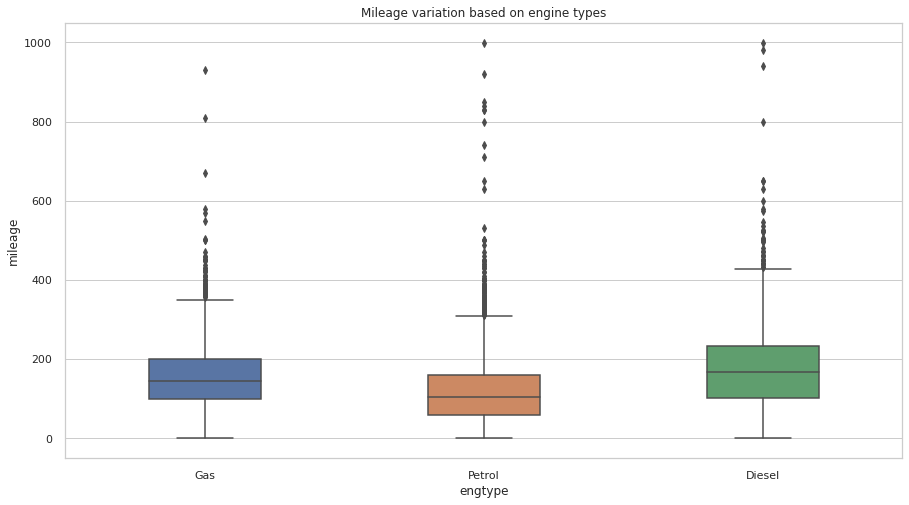

In [46]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.boxplot(x="engtype", y='mileage', data = car_sales, width = 0.4)
plt.title('Mileage variation based on engine types')

This explains that cars with **diesel** **engine** types have been **driven** **highly**.

<a id=section70304></a>
### 7.3.4 How mileage varies based on drive type?

Text(0.5, 1.0, 'Mileage variation based on drive types')

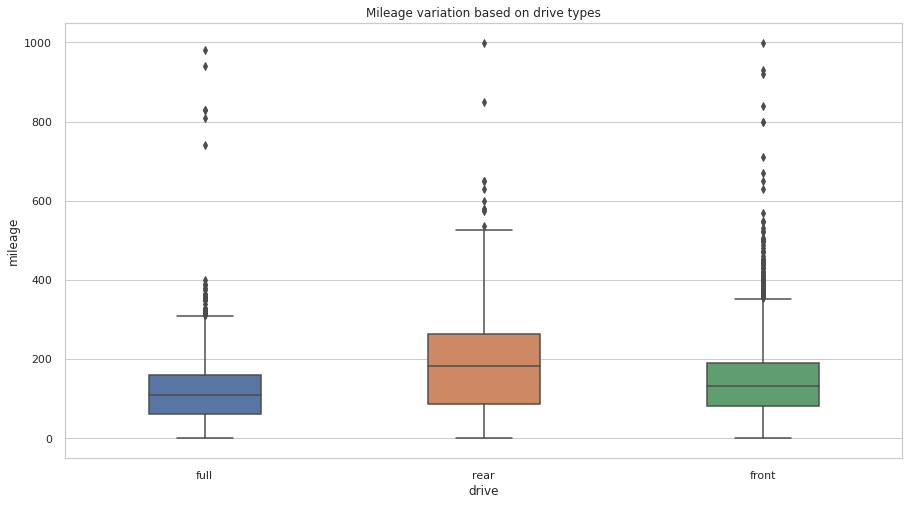

In [47]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.boxplot(x="drive", y='mileage', data = car_sales, width = 0.4)
plt.title('Mileage variation based on drive types')

This shows that cars with **rear** drive types were **highly used**.

<a id=section704></a>
### 7.4 Year Based Analysis

<a id=section70401></a>
### 7.4.1 What is the car sale distribution over years?

In [48]:
df1 = pd.DataFrame(car_sales.groupby('year')['car'].value_counts().sort_values(ascending=False))
df1.rename(columns={'car': 'carcounts'}, inplace=True)
df1.reset_index(inplace = True)
df2 = pd.DataFrame(df1.groupby('year')['carcounts'].sum().sort_values(ascending=False))
df2.rename(columns={'carcounts': 'totalcarcount'}, inplace=True)
df2.reset_index(inplace = True)
df2.head()

year  totalcarcount
0  2008           1150
1  2007            929
2  2012            760
3  2011            691
4  2013            641

Text(0.5, 1.0, 'Car on sale count based on year')

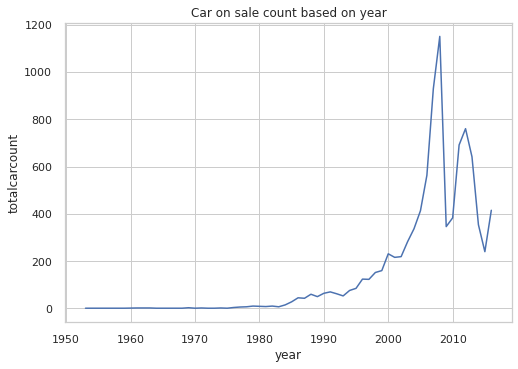

In [49]:
sns.lineplot(data=df2, x='year',y='totalcarcount')
plt.title("Car on sale count based on year")

This shows that high number of car sale were between 2005 -2012 with 2008 having the maximum count of 1150 cars on sale.

<a id=section70402></a>
### 7.4.2 What is the price variation over years?

Text(0.5, 1.0, 'Heatmap for correlated features in car sale dataset')

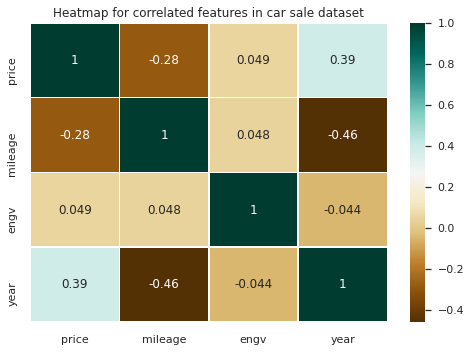

In [50]:
sns.heatmap(car_sales.corr(),annot=True, linewidths=.5, cmap = 'BrBG')
plt.title("Heatmap for correlated features in car sale dataset")

Text(0.5, 1.0, 'Variance in price over years')

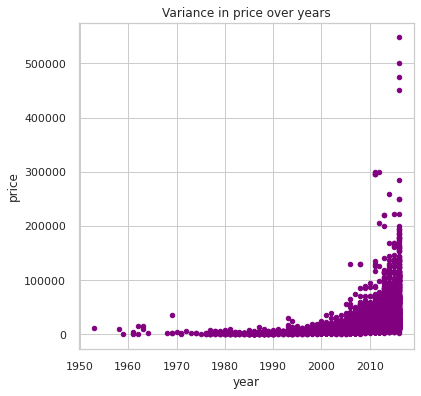

In [51]:
car_sales.plot(kind = 'scatter', x = 'year', y = 'price', figsize = (6,6), color = 'purple', grid = True)
plt.title('Variance in price over years')

This shows that **price** and **year** are **positively** **correlated**. Latest cars on sale fetches more price.

<a id=section705></a>
### 7.5 Multivariant Feature Analysis

<a id=section70501></a>
### 7.5.1 What is the registered car sale distribution based on body type?

Text(0.5, 1.0, 'Registered car sale distribution based on body type')

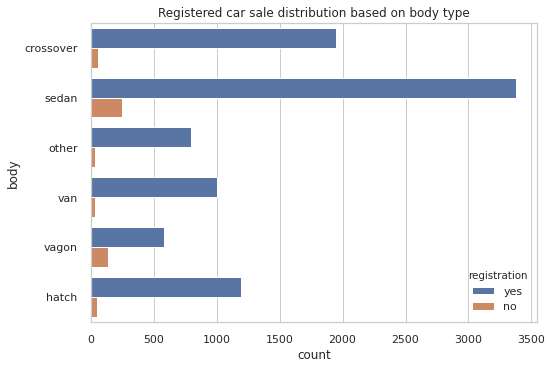

In [52]:
sns.countplot(y='body', data=car_sales, hue='registration',orient='v' )
plt.title("Registered car sale distribution based on body type")

This explains that we have **high** sale of **sedan** type which are **registered** in ukraine.

<a id=section70502></a>
### 7.5.2 What is the registered cars on sale over years?

In [53]:
df = pd.DataFrame(car_sales.groupby('year')['registration'].value_counts().sort_values(ascending=False))
df.rename(columns={'registration': 'regcounts'}, inplace=True)
df.reset_index(inplace = True)
df.head()

year registration  regcounts
0  2008          yes       1142
1  2007          yes        914
2  2012          yes        749
3  2011          yes        681
4  2013          yes        632

Text(0.5, 1.0, 'Years group having max sale/registration')

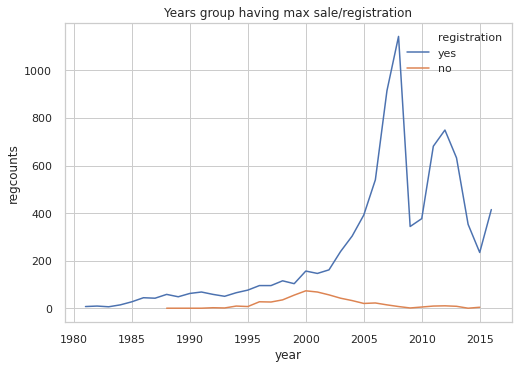

In [54]:
sns.lineplot(data=df[df['year']>1980], x='year', y='regcounts', hue='registration')
plt.title("Years group having max sale/registration")

This shows that least number of sales were between 1953 – 1983.  Registered cars are on more sale than the unregistered cars. Highest number of registered car sales are in between 2005 – 2010 and maximum approx in 2008 

<a id=section70503></a>
### 7.5.3 What is the price variance over years based on body type?

Text(0.5, 1.0, 'Price variance over years based on body type')

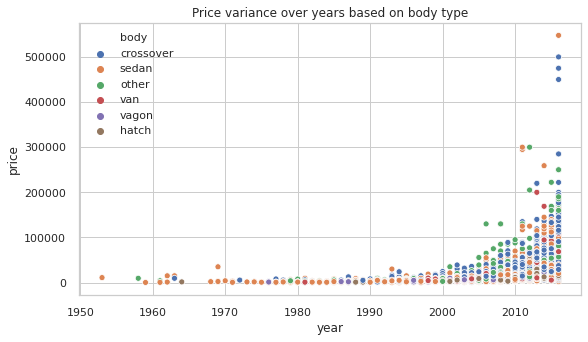

In [55]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = car_sales, x = 'year', y = 'price', hue = 'body', )
plt.title('Price variance over years based on body type')

This explains that latest crossover body type cars were quoted with more price.

<a id=section70504></a>
### 7.5.4 What is the price variance over years based on engine type?

Text(0.5, 1.0, 'Price variance over years based on engine type')

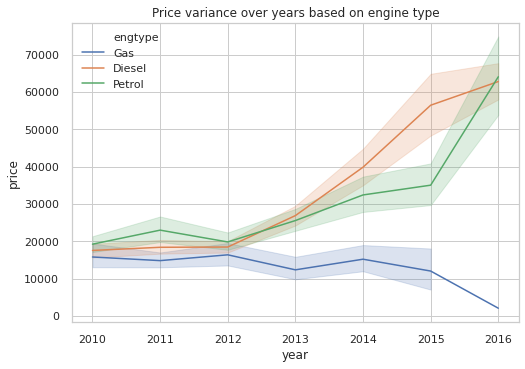

In [56]:
sns.lineplot(data=car_sales[car_sales.year >= 2010], y='price', x='year', hue='engtype')
plt.title("Price variance over years based on engine type")

Text(0.5, 1.0, 'Price variance over years based on engine type')

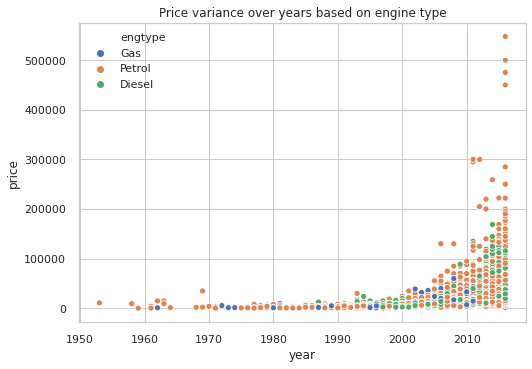

In [57]:
sns.scatterplot(data = car_sales, x = 'year', y = 'price', hue = 'engtype')
plt.title("Price variance over years based on engine type")

This explains that **more** number of **petrol** engine type cars were on sale with a **higher** **price** over years.


<a id=section70505></a>
### 7.5.5 What is the price variance over years based on drive type?

Text(0.5, 1.0, 'Price variance over years based on drive type')

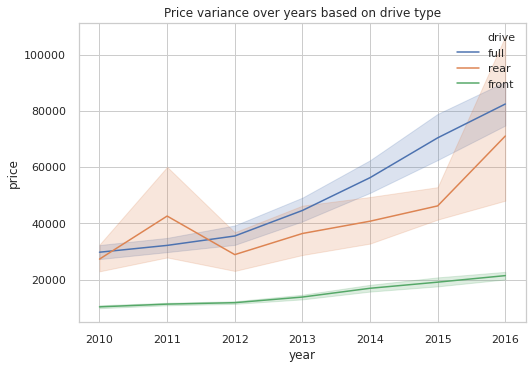

In [58]:
sns.lineplot(data=car_sales[car_sales.year >= 2010], y='price', x='year', hue='drive')
plt.title("Price variance over years based on drive type")

This explains that **more** number of **full drive** type cars were on sale with a **higher** **price** over years.

<a id=section70506></a>
### 7.5.6 What is the price variance over mileage based on engine type?

Text(0.5, 1.0, 'Price variance over mileage based on engine type')

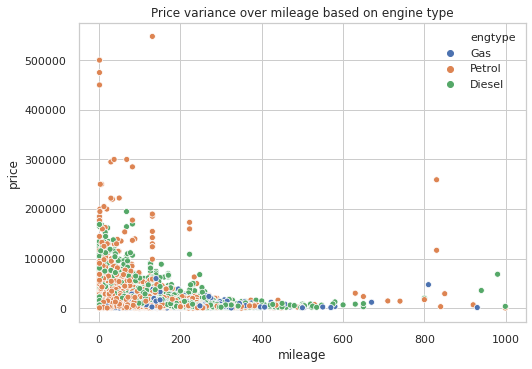

In [59]:
sns.scatterplot(data = car_sales, x = 'mileage', y = 'price', hue = 'engtype')
plt.title("Price variance over mileage based on engine type")

This shows that prominently **petrol** engine type cars with **lesser** **mileage** have a **decent sale price**. But still, we can overall conclude that change in mileage have change in price.

<a id=section70507></a>
### 7.5.7 What is the price variance over mileage based on body type?

Text(0.5, 1.0, 'Price variance over mileage based on body type')

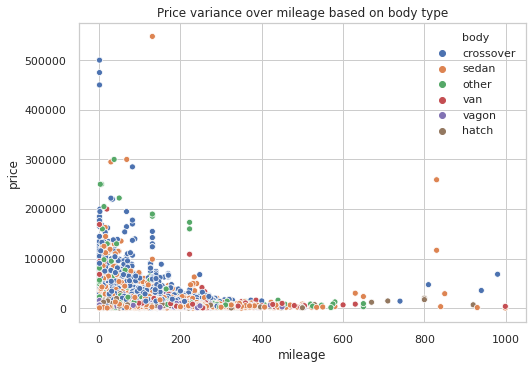

In [60]:
sns.scatterplot(data = car_sales, x = 'mileage', y = 'price', hue = 'body')
plt.title("Price variance over mileage based on body type")

This shows that prominently **crossover** body type cars with lesser mileage have a **decent sale price range** which is followed by sedan body type cars.

<a id=section70508></a>
### 7.5.8 What is the price variance over mileage based on drive type?

Text(0.5, 1.0, 'Price variance over mileage based on drive type')

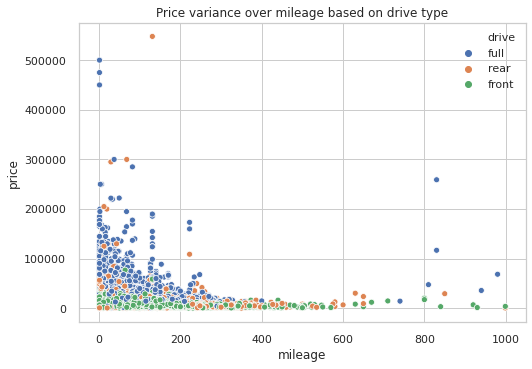

In [61]:
sns.scatterplot(data = car_sales, x = 'mileage', y = 'price', hue = 'drive')
plt.title("Price variance over mileage based on drive type")

This shows that prominently **full** drive type cars with lesser mileage have a **decent sale price range** which is followed by front and rear.

<a id=section8></a> 
### 8. Conclusion

* Using pandas profiling, we performed column standardization, removing duplicates and handled all the missing values in the dataset.
* On feature wise analysis we infer that:
  * Volkswagen , Mercedes-Benz and BMW are the top car brands on sale past 50 years.
  * Most common body, engine and  drive type cars on sale were sedan, petrol and front type cars
* On price based analysis we infer that:
  * Bently and Ferrari were the most high priced cars on sale.
  * Crossover followed by Sedan body type, Diesel engine type and Full drive type cars have high price range respectively.
* On mileage based analysis we infer that:
  * Lesser the mileage, more is the price
  * Crossover followed by hatch body type, Petrol engine type and Full drive type cars have lesser mileage range respectively.
* On year based analysis we infer that:
  * Maximum cars where on sale between 2005-2012 and 2008 having the highest count.
  * Price and year are positively correlated which means price increases over years.
* Multi - variant analysis:
  * Crossover, Sedan body type, Petrol engine type and full drive type cars have increase in price over years.
  * Petrol engines with lesser mileage were quoted with a fair price range on sale.


<a id=section801></a> 
### 8.1 Actionable Insights

* We can infer that high price value can be quoted/predicted for cars with a combination of following:
  * Latest model cars with less than 5 years of registration.
  * High brand value cars.
  * Cars with less mileage.
  * Crossover and sedan body type cars.
  * Petrol engine type cars.
  * Full drive type cars.